In [199]:
# import pandas as pd 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix, roc_auc_score
from statsmodels.tsa.arima.model import ARIMA
# df=pd.read_csv('AIMS COMMUNITY CAMP PATIENT DATA (Response001s) - Form Responses 1.csv')
# df = pd.read_csv('kp.csv')
df= pd.read_csv('kp_updated (1).csv')
# df= pd.read_csv('kp_updated_modified_balanced.csv')
# df= pd.read_csv('diabetes_prediction_dataset.csv')

df


,Timestamp,Score,Camp Date,Area,Name,Gender,National Id Card Number,Address,Contact Number,Age,...,Foot Screening Notes,Dental Screening,Doctors Name,Doctor's Notes,Medicines/Insulin Prescribed,Prescribed Medicine Names,Unnamed: 31,Unnamed: 32,Unnamed: 33,Obesity
0,1/23/2024 21:37,NaN,1/23/2024,Regi 01,Raza Hasan,Male,hdf123-332-222-333,Regi,NaN,51 - 60,...,yes,NaN,Need to be seen in the next visit,NaN,Insullin,NaN,NaN,NaN,NaN,NaN
1,1/24/2024 15:11,NaN,1/24/2024,Regi 01,ABC,Male,51669923450,Regi,920104567,31 - 40,...,klkjllkkjl,NaN,glm,dlih,Pain killer,zobix,NaN,NaN,NaN,NaN
2,1/25/2024 12:01,NaN,1/21/2024,Chamkini 02,Nasarullah,Male,nill,Chamkini,3179570829,41 - 50,...,not screened,NaN,Dr Ijaz Ali Shah,No Notes,Hypertension Medicine,Tab Telsan,NaN,NaN,NaN,NaN
3,1/25/2024 12:08,NaN,1/21/2024,Chamkini 02,Abdul Sattar,Male,Nil,Chamkani,3171919625,51 - 60,...,NaN,NaN,"Dr, Ejaz Ali Shah",NaN,Diabetes Medicine,Tab. Sitaglumet,NaN,NaN,NaN,NaN
4,1/25/2024 12:12,NaN,1/21/2024,Chamkini 02,Khadim,Male,NaN,Chamkini,3005855570,above 60,...,not mentioned,NaN,Dr Ijaz Ali Shah,not mentioned,Diabetes Medicine,Telsan and Sitaglumet,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,NaN,NaN,NaN,Charsadda,M/O Maaz,Male,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4431,NaN,NaN,NaN,Charsadda,Nadia W/O Shah Mohammad,Female,NaN,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4432,NaN,NaN,NaN,Charsadda,Khahish Bibi,Female,NaN,NaN,NaN,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4433,NaN,NaN,NaN,Charsadda,Nasarullah,Female,NaN,NaN,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
df.columns


Index(['Timestamp', 'Score', 'Camp Date', 'Area', 'Name', 'Gender',
       'National Id Card Number', 'Address', 'Contact Number ', 'Age',
       'History of Diabetes', 'History of Hypertension',
       'The patient was provided with Diabetes Awareness in the camp today.',
       'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height',
       'Weight', 'BMI', 'Cholesterol', 'HBA1c',
       'Diet Chart given to the patient', 'Patient diagnosis',
       'Patient Diagnosed with Hypertension',
       'Patient Referred to Sugar Hospital', 'Eye Screening Notes',
       'Foot Screening Notes', 'Dental Screening', 'Doctors Name',
       'Doctor's Notes', 'Medicines/Insulin Prescribed',
       'Prescribed  Medicine Names ', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Obesity'],
      dtype='object')

In [201]:
df.shape

(4435, 35)

In [202]:
df.isnull().sum()

Timestamp                                                              1401
Score                                                                  4435
Camp Date                                                              1401
Area                                                                      0
Name                                                                      3
Gender                                                                    0
National Id Card Number                                                2144
Address                                                                1457
Contact Number                                                         2047
Age                                                                     113
History of Diabetes                                                    1408
History of Hypertension                                                1409
The patient was provided with Diabetes Awareness in the camp today.       3
Random Blood

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 35 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Timestamp                                                            3034 non-null   object 
 1   Score                                                                0 non-null      float64
 2   Camp Date                                                            3034 non-null   object 
 3   Area                                                                 4435 non-null   object 
 4   Name                                                                 4432 non-null   object 
 5   Gender                                                               4435 non-null   object 
 6   National Id Card Number                                              2291 non-null   object 
 7   Addres

In [204]:
df.describe()

,Score,Unnamed: 31,Unnamed: 32,Unnamed: 33
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [205]:
df.columns


Index(['Timestamp', 'Score', 'Camp Date', 'Area', 'Name', 'Gender',
       'National Id Card Number', 'Address', 'Contact Number ', 'Age',
       'History of Diabetes', 'History of Hypertension',
       'The patient was provided with Diabetes Awareness in the camp today.',
       'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height',
       'Weight', 'BMI', 'Cholesterol', 'HBA1c',
       'Diet Chart given to the patient', 'Patient diagnosis',
       'Patient Diagnosed with Hypertension',
       'Patient Referred to Sugar Hospital', 'Eye Screening Notes',
       'Foot Screening Notes', 'Dental Screening', 'Doctors Name',
       'Doctor's Notes', 'Medicines/Insulin Prescribed',
       'Prescribed  Medicine Names ', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Obesity'],
      dtype='object')

In [206]:
# 

In [207]:
columns_to_drop = ['Score', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Obesity', 'Camp Date', 'Area', 'National Id Card Number', 'Address','Doctors Name', 'Medicines/Insulin Prescribed' ]
df = df.drop(columns=columns_to_drop)
df

,Timestamp,Name,Gender,Contact Number,Age,History of Diabetes,History of Hypertension,The patient was provided with Diabetes Awareness in the camp today.,Random Blood Sugar Reading,Blood Pressure Readings,...,HBA1c,Diet Chart given to the patient,Patient diagnosis,Patient Diagnosed with Hypertension,Patient Referred to Sugar Hospital,Eye Screening Notes,Foot Screening Notes,Dental Screening,Doctor's Notes,Prescribed Medicine Names
0,1/23/2024 21:37,Raza Hasan,Male,NaN,51 - 60,Yes,Yes,Yes,below 120,low,...,NaN,Yes,Pre-diabetic,Yes,Yes,Yes,yes,NaN,NaN,NaN
1,1/24/2024 15:11,ABC,Male,920104567,31 - 40,No,No,No,below 120,high. Above 130/90,...,NaN,No,Pre-diabetic,No,No,NaN,klkjllkkjl,NaN,dlih,zobix
2,1/25/2024 12:01,Nasarullah,Male,3179570829,41 - 50,No,Yes,Yes,below 120,high. Above 130/90,...,NaN,Not mentioned,none of the above,Yes,No,not screened,not screened,NaN,No Notes,Tab Telsan
3,1/25/2024 12:08,Abdul Sattar,Male,3171919625,51 - 60,Yes,No,Yes,300 above,normal. Between 120/80 - 130/90,...,NaN,No,Type - 2 Diabetes,Yes,Yes,NaN,NaN,NaN,NaN,Tab. Sitaglumet
4,1/25/2024 12:12,Khadim,Male,3005855570,above 60,Yes,Yes,Yes,"200 - 300, 300 above",high. Above 130/90,...,NaN,Yes,Type - 2 Diabetes,Yes,not mentioned,not mentioned,not mentioned,NaN,not mentioned,Telsan and Sitaglumet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,NaN,M/O Maaz,Male,NaN,40,NaN,NaN,Yes,152,130/85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4431,NaN,Nadia W/O Shah Mohammad,Female,NaN,25,NaN,NaN,Yes,102,100/70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4432,NaN,Khahish Bibi,Female,NaN,56,NaN,NaN,Yes,267,120/80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4433,NaN,Nasarullah,Female,NaN,14,NaN,NaN,Yes,134,120/80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: []
Categorical Columns: ['Timestamp', 'Name', 'Gender', 'Contact Number ', 'Age', 'History of Diabetes', 'History of Hypertension', 'The patient was provided with Diabetes Awareness in the camp today.', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c', 'Diet Chart given to the patient', 'Patient diagnosis', 'Patient Diagnosed with Hypertension', 'Patient Referred to Sugar Hospital', 'Eye Screening Notes', 'Foot Screening Notes', 'Dental Screening', "Doctor's Notes", 'Prescribed  Medicine Names ']


In [209]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Display the encoded DataFrame
print(df)

      Timestamp  Name  Gender  Contact Number   Age  History of Diabetes  \
0             0  1610       3              616  120                    3   
1             1     3       3              605   66                    1   
2             2  1327       3              560   92                    1   
3             3    32       3              556  120                    3   
4             4   898       3              474  187                    3   
...         ...   ...     ...              ...  ...                  ...   
4430       2668   994       3              616   88                    4   
4431       2668  1261       1              616   50                    4   
4432       2668   900       1              616  130                    4   
4433       2668  1327       1              616   12                    4   
4434       2668    32       1              616   38                    4   

      History of Hypertension  \
0                           4   
1                    

In [210]:
# Correlation Heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()

In [211]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse_output=False)

In [212]:
# Fit and transform the categorical data
# encoded_data = encoder.fit_transform(df[categorical_columns])

# # Create a DataFrame for the encoded columns
# encoded_columns = encoder.get_feature_names_out(categorical_columns)
# encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# encoded_df

In [213]:
from sklearn.impute import SimpleImputer
# imputer= SimpleImputer(strategy='median')

# num_imputer = SimpleImputer(strategy='median')
# encoded_df[numerical_columns] = num_imputer.fit_transform(encoded_df[numerical_columns])

# # Impute missing values in categorical columns
# cat_imputer = SimpleImputer(strategy='mean')
# encoded_df[categorical_columns] = cat_imputer.fit_transform(encoded_df[categorical_columns])

# encoded_df = pd.concat([encoded_df.drop(columns=categorical_columns), encoded_df], axis=1)
# encoded_df



In [214]:
# # Define thresholds for risk
# bmi_threshold = 25  # Overweight
# cholesterol_threshold = 240  # High cholesterol
# hba1c_threshold = 6.5  # Diabetic threshold




# # Create a health risk target column
# df['Health Risk'] = (
#     (df['History of Diabetes'] == 'Yes') |
#     (df['History of Hypertension'] == 'Yes') |
#     (df['BMI'] > bmi_threshold) |
#     (df['Cholesterol'] > cholesterol_threshold) |
#     (df['HBA1c'] >= hba1c_threshold)
# ).astype(int)

# df

In [215]:
# from sklearn.cluster import KMeans

# # Selecting features for clustering
# X = df[numerical_columns]

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# df['cluster'] = kmeans.fit_predict(X)

# # Visualize the clusters
# sns.scatterplot(x='age', y='thalach', hue='cluster', data=df, palette='viridis')
# plt.title('KMeans Clustering')
# plt.show()


In [216]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Timestamp', 'Name', 'Gender', 'Contact Number ', 'Age', 'History of Diabetes', 'History of Hypertension', 'The patient was provided with Diabetes Awareness in the camp today.', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c', 'Diet Chart given to the patient', 'Patient diagnosis', 'Patient Diagnosed with Hypertension', 'Patient Referred to Sugar Hospital', 'Eye Screening Notes', 'Foot Screening Notes', 'Dental Screening', "Doctor's Notes", 'Prescribed  Medicine Names ']
Categorical Columns: []


In [217]:
# from sklearn.cluster import KMeans

# # Selecting features for clustering
# X = df[numerical_columns]

# # Apply KMeans clustering
# kmeans = KMeans(n_clusters=3, random_state=42)
# df['cluster'] = kmeans.fit_predict(X)

# # Visualize the clusters
# sns.scatterplot(x='age', y='thalach', hue='cluster', data=df, palette='viridis')
# plt.title('KMeans Clustering')
# plt.show()


In [218]:
if 'History of Diabetes' in df.columns:
    print("Column is present!")
else:
    print("Column is not present!")


Column is present!


In [219]:
if 'History of Hypertension' in df.columns:
    print("Column is present!")
else:
    print("Column is not present!")


Column is present!


In [220]:
# df.columns = df.columns.str.strip().str.lower()
df.head()

,Timestamp,Name,Gender,Contact Number,Age,History of Diabetes,History of Hypertension,The patient was provided with Diabetes Awareness in the camp today.,Random Blood Sugar Reading,Blood Pressure Readings,...,HBA1c,Diet Chart given to the patient,Patient diagnosis,Patient Diagnosed with Hypertension,Patient Referred to Sugar Hospital,Eye Screening Notes,Foot Screening Notes,Dental Screening,Doctor's Notes,Prescribed Medicine Names
0,0,1610,3,616,120,3,4,2,435,241,...,90,4,3,2,6,90,40,10,133,1647
1,1,3,3,605,66,1,1,1,435,240,...,90,0,3,0,2,99,35,10,123,1646
2,2,1327,3,560,92,1,4,2,435,240,...,90,1,6,2,2,97,39,10,77,1347
3,3,32,3,556,120,3,1,2,207,244,...,90,0,5,2,6,99,41,10,133,1368
4,4,898,3,474,187,3,4,2,106,240,...,90,4,5,2,7,96,38,10,129,1416


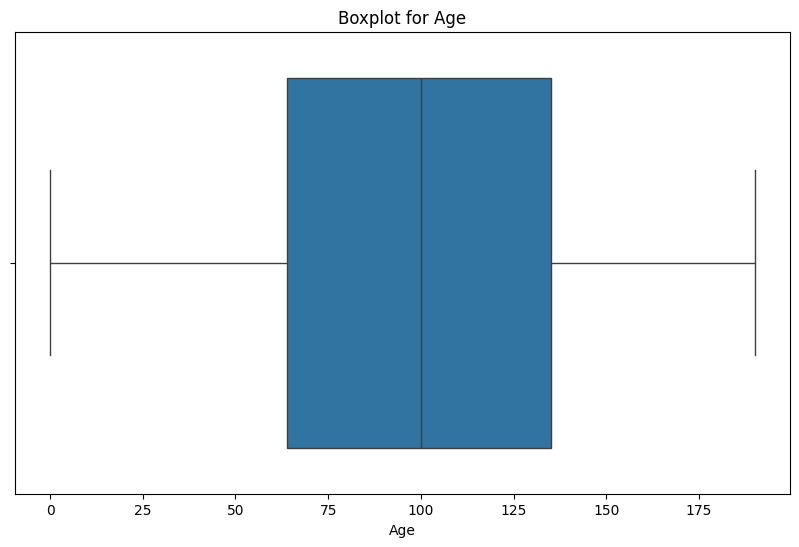

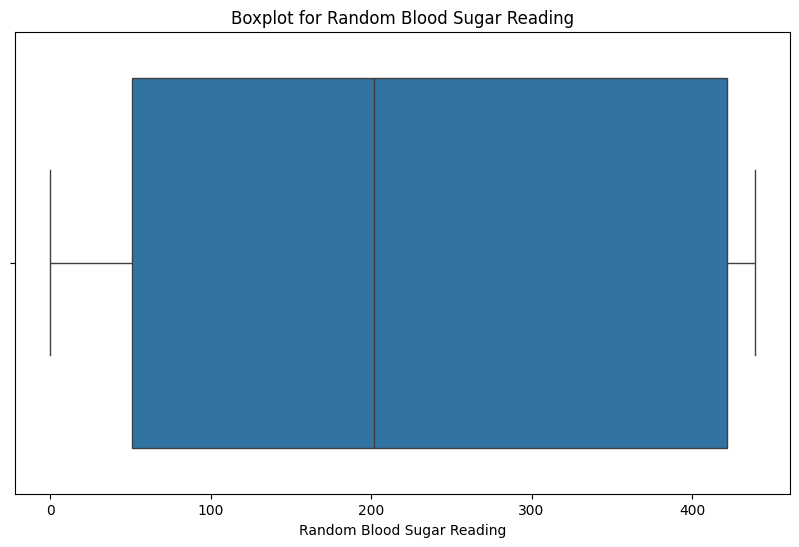

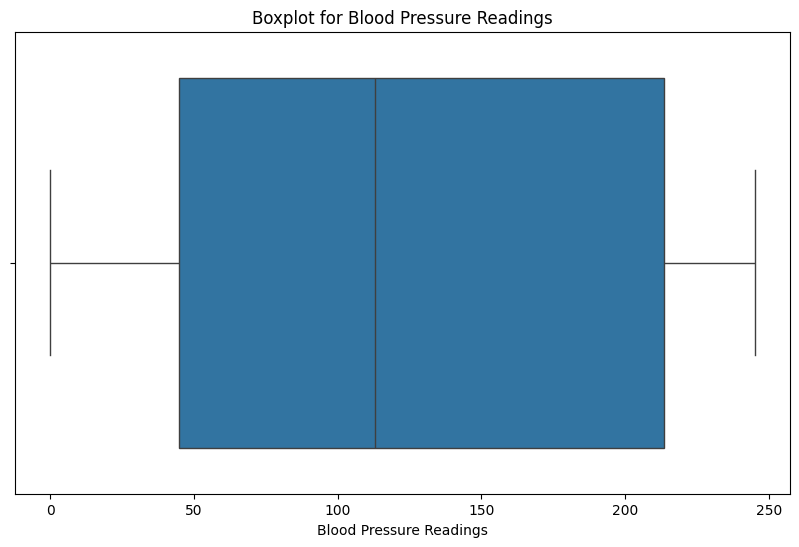

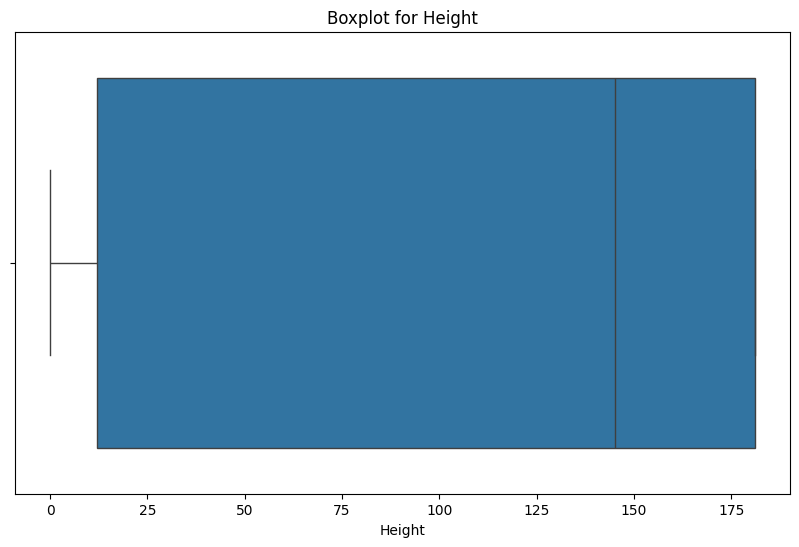

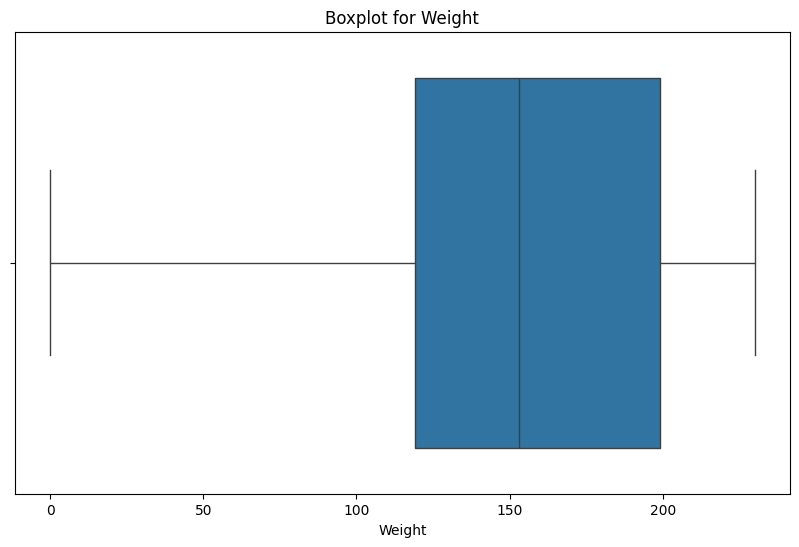

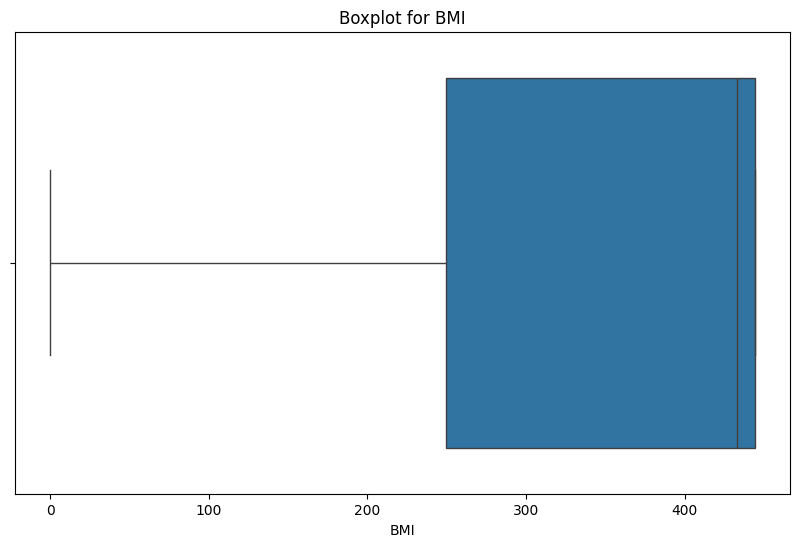

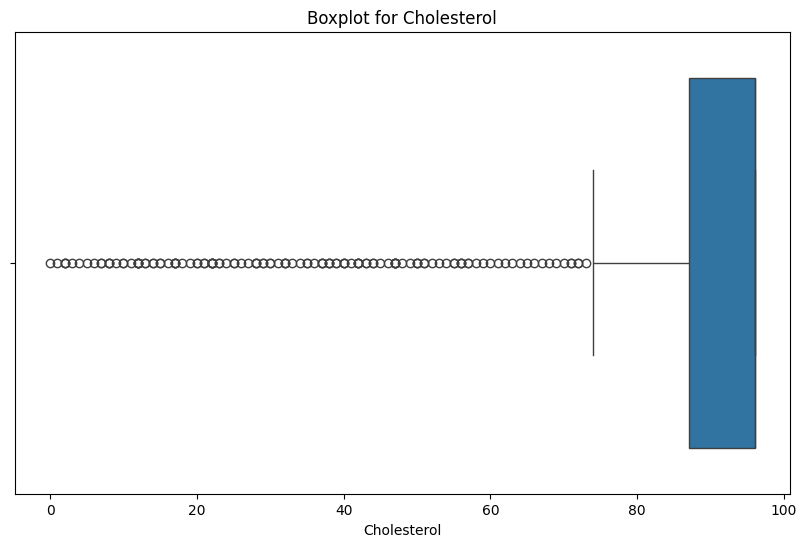

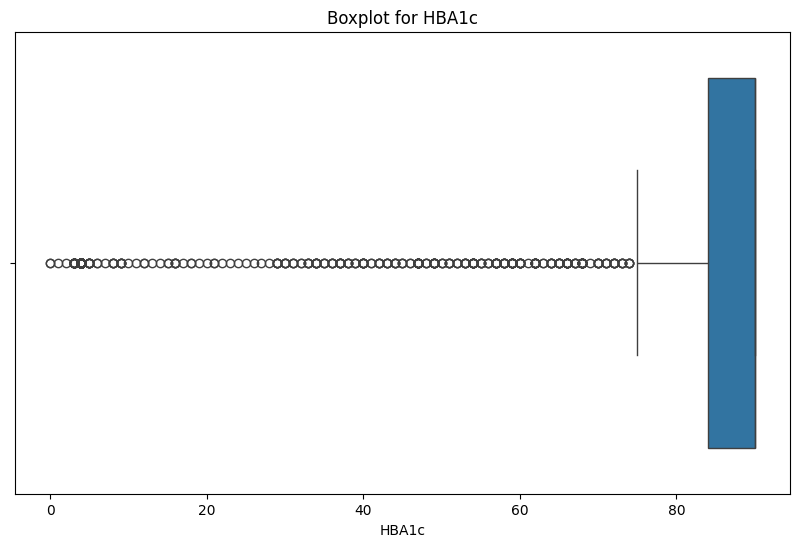

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Columns to visualize outliers
numerical_columns = [
    'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
    'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
]

# Function to visualize outliers using a boxplot
def visualize_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=data[column])
            plt.title(f'Boxplot for {column}')
            plt.xlabel(column)
            plt.show()

# Visualize outliers
visualize_outliers(df, numerical_columns)


In [222]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from scipy.stats import skew

# # # List of numerical columns
# # numerical_columns = [
# #     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
# #     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
# # ]

# # # Create a copy of the original DataFrame to store transformed data
# # transformed_df = df.copy()

# # # Iterate over each numerical column
# # for column in numerical_columns:
# #     print(f"\nProcessing column: {column}")
    
# #     # Drop NaN values for skewness calculation
# #     data = df[column].dropna()
    
# #     # Check skewness before transformation
# #     original_skewness = skew(data)
# #     print(f"Original Skewness: {original_skewness}")
    
# #     # Apply transformations based on skewness
# #     if original_skewness > 0:
# #         # Right-skewed: Apply log transformation
# #         transformed_data = np.log1p(data)  # log1p to handle zero values
# #         print("Applied log transformation for right-skewed data.")
# #     elif original_skewness < 0:
# #         # Left-skewed: Apply square transformation
# #         transformed_data = np.square(data)
# #         print("Applied square transformation for left-skewed data.")
# #     else:
# #         transformed_data = data  # No transformation needed
# #         print("No skewness detected. No transformation applied.")
    
# #     # Check skewness after transformation
# #     transformed_skewness = skew(transformed_data)
# #     print(f"Transformed Skewness: {transformed_skewness}")
    
# #     # Store the transformed data back in the DataFrame
# #     transformed_df[column] = transformed_data
    
# #     # Plot original and transformed data for visualization
# #     plt.figure(figsize=(12, 5))
    
# #     # Original data histogram
# #     plt.subplot(1, 2, 1)
# #     plt.hist(data, bins=30, alpha=0.7, color='blue')
# #     plt.title(f"Original Distribution: {column}")
# #     plt.xlabel("Values")
# #     plt.ylabel("Frequency")
    
# #     # Transformed data histogram
# #     plt.subplot(1, 2, 2)
# #     plt.hist(transformed_data, bins=30, alpha=0.7, color='green')
# #     plt.title(f"Transformed Distribution: {column}")
# #     plt.xlabel("Values")
# #     plt.ylabel("Frequency")
    
# #     plt.tight_layout()
# #     plt.show()



# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import skew

# # List of numerical columns
# numerical_columns = [
#     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
#     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
# ]

# # Iterate over each numerical column
# for column in numerical_columns:
#     print(f"\nProcessing column: {column}")
    
#     # Drop NaN values for skewness calculation
#     data = df[column].dropna()
    
#     # Check skewness before transformation
#     original_skewness = skew(data)
#     print(f"Original Skewness: {original_skewness}")
    
#     # Apply transformations based on skewness
#     if original_skewness > 0:
#         # Right-skewed: Apply log transformation
#         df[column] = np.log1p(df[column])  # Apply log1p directly to the column
#         print("Applied log transformation for right-skewed data.")
#     elif original_skewness < 0:
#         # Left-skewed: Apply square transformation
#         df[column] = np.square(df[column])  # Apply square directly to the column
#         print("Applied square transformation for left-skewed data.")
#     else:
#         print("No skewness detected. No transformation applied.")
    
#     # Check skewness after transformation
#     transformed_data = df[column].dropna()  # Transformed data without NaN values
#     transformed_skewness = skew(transformed_data)
#     print(f"Transformed Skewness: {transformed_skewness}")
    
#     # Plot original and transformed data for visualization
#     plt.figure(figsize=(12, 5))
    
#     # Original data histogram
#     plt.subplot(1, 2, 1)
#     plt.hist(data, bins=30, alpha=0.7, color='blue')
#     plt.title(f"Original Distribution: {column}")
#     plt.xlabel("Values")
#     plt.ylabel("Frequency")
    
#     # Transformed data histogram
#     plt.subplot(1, 2, 2)
#     plt.hist(transformed_data, bins=30, alpha=0.7, color='green')
#     plt.title(f"Transformed Distribution: {column}")
#     plt.xlabel("Values")
#     plt.ylabel("Frequency")
    
#     plt.tight_layout()
#     plt.show()


In [223]:
# import matplotlib.pyplot as plt

# # List of numerical columns
# numerical_columns = [
#     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
#     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
# ]

# # Visualize transformed data using boxplots
# plt.figure(figsize=(15, len(numerical_columns) * 5))

# for i, column in enumerate(numerical_columns, 1):
#     plt.subplot(len(numerical_columns), 1, i)
#     plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
#     plt.title(f"Boxplot for Transformed {column}")
#     plt.xlabel("Values")
#     plt.ylabel(column)

# plt.tight_layout()
# plt.show()


In [224]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Numerical Columns to visualize outliers
# numerical_columns = [
#     'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
#     'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c', 
#     'Health Risk', 'BMI_Calculated'
# ]

# # Function to visualize outliers using a boxplot
# def visualize_outliers(data, columns):
#     for column in columns:
#         if column in data.columns:
#             plt.figure(figsize=(10, 6))
#             sns.boxplot(x=data[column])
#             plt.title(f'Boxplot for {column}')
#             plt.xlabel(column)
#             plt.show()

# # Visualize outliers
# visualize_outliers(df, numerical_columns)


In [225]:
# # Define thresholds for risk
# bmi_threshold = 25  # Overweight
# cholesterol_threshold = 240  # High cholesterol
# hba1c_threshold = 6.5  # Diabetic threshold
# # bmi_threshold = 100  # Overweight
# # cholesterol_threshold = 500  # High cholesterol
# # hba1c_threshold = 10  # Diabetic threshold




# # Create a health risk target column
# df['Health Risk'] = (
#     (df['History of Diabetes'] == 'Yes') |
#     (df['History of Hypertension'] == 'Yes') |
#     (df['BMI'] > bmi_threshold) |
#     (df['Cholesterol'] > cholesterol_threshold) |
#     (df['HBA1c'] >= hba1c_threshold)
# ).astype(int)

# df



# Define thresholds for risk
# bmi_threshold = 25  # Overweight
# cholesterol_threshold = 240  # High cholesterol
# hba1c_threshold = 6.5  # Diabetic threshold

# # Create a health risk target column
# df['Health Risk'] = 0  # Default value is 0 (no risk)

# # Update the column to 1 where the conditions are satisfied
# df.loc[
#     (df['History of Diabetes'] == 'Yes') |
#     (df['History of Hypertension'] == 'Yes') |
#     (df['BMI'] > bmi_threshold) |
#     (df['Cholesterol'] > cholesterol_threshold) |
#     (df['HBA1c'] >= hba1c_threshold),
#     'Health Risk'
# ] = 1

# # Display the DataFrame to verify
# print(df[['Health Risk']].head())


In [226]:
# Define thresholds for risk
# bmi_threshold = 25  # Overweight
# cholesterol_threshold = 240  # High cholesterol
# hba1c_threshold = 6.5  # Diabetic threshold


bmi_threshold = 30  # Overweight
cholesterol_threshold = 300  # High cholesterol
hba1c_threshold = 8  # Diabetic threshold


# Ensure numeric columns have correct data types
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['Cholesterol'] = pd.to_numeric(df['Cholesterol'], errors='coerce')
df['HBA1c'] = pd.to_numeric(df['HBA1c'], errors='coerce')

# Create a health risk target column
df['Health Risk'] = 0  # Default value is 0 (no risk)

# Update the column to 1 where the conditions are satisfied
df.loc[
    (df['History of Diabetes'] == 'Yes') |
    (df['History of Hypertension'] == 'Yes') |
    (df['BMI'] > bmi_threshold) |
    (df['Cholesterol'] > cholesterol_threshold) |
    (df['HBA1c'] >= hba1c_threshold),
    'Health Risk'
] = 1

# Display the DataFrame to verify
print(df[['Health Risk']].head())


   Health Risk
0            1
1            1
2            1
3            1
4            1


In [227]:
# Function to handle outliers using the IQR method
def handle_outliers(data, column, method='cap'):
    Q1 = data[column].quantile(0.25)  # First quartile
    Q3 = data[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    if method == 'remove':
        # Remove outliers
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    elif method == 'cap':
        # Cap outliers to the nearest bound
        data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return data

# Specify the columns to handle outliers
columns_to_handle = [
    'Age', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 
    'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c'
]

# Handle outliers in the specified columns
for column in columns_to_handle:
    if column in df.columns:
        df = handle_outliers(df, column, method='cap')  # Change method to 'remove' if you prefer

# Display the updated dataset
print("Dataset after handling outliers:")
print(df.shape)


Dataset after handling outliers:
(4435, 25)


In [228]:
# # Function to handle outliers using the IQR method
# def handle_outliers(data, column, method='cap'):
#     Q1 = data[column].quantile(0.25)  # First quartile
#     Q3 = data[column].quantile(0.75)  # Third quartile
#     IQR = Q3 - Q1  # Interquartile range
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     if method == 'remove':
#         # Remove outliers
#         data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
#     elif method == 'cap':
#         # Cap outliers to the nearest bound
#         data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
#     return data

# # Handle outliers in numerical columns
# for column in numerical_columns:
#     if column in df.columns:
#         df = handle_outliers(df, column, method='cap')  # Change method to 'remove' if you prefer

# # Display the updated dataset
# print("Dataset after handling outliers:")
# print(df.shape)


In [229]:
# df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 60, 100], labels=['Child', 'Adult', 'Senior'])


In [230]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Print the results
print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['Timestamp', 'Name', 'Gender', 'Contact Number ', 'Age', 'History of Diabetes', 'History of Hypertension', 'The patient was provided with Diabetes Awareness in the camp today.', 'Random Blood Sugar Reading', 'Blood Pressure Readings', 'Height', 'Weight', 'BMI', 'Cholesterol', 'HBA1c', 'Diet Chart given to the patient', 'Patient diagnosis', 'Patient Diagnosed with Hypertension', 'Patient Referred to Sugar Hospital', 'Eye Screening Notes', 'Foot Screening Notes', 'Dental Screening', "Doctor's Notes", 'Prescribed  Medicine Names ', 'Health Risk']
Categorical Columns: []


In [231]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4435 entries, 0 to 4434
Data columns (total 25 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Timestamp                                                            4435 non-null   int32  
 1   Name                                                                 4435 non-null   int32  
 2   Gender                                                               4435 non-null   int32  
 3   Contact Number                                                       4435 non-null   int32  
 4   Age                                                                  4435 non-null   int64  
 5   History of Diabetes                                                  4435 non-null   int32  
 6   History of Hypertension                                              4435 non-null   int32  
 7   The pa

In [232]:
import numpy as np

# Check for NaN values
print(df.isna().sum())

# Check for infinity values
print((df == np.inf).sum())
print((df == -np.inf).sum())


Timestamp                                                              0
Name                                                                   0
Gender                                                                 0
Contact Number                                                         0
Age                                                                    0
History of Diabetes                                                    0
History of Hypertension                                                0
The patient was provided with Diabetes Awareness in the camp today.    0
Random Blood Sugar Reading                                             0
Blood Pressure Readings                                                0
Height                                                                 0
Weight                                                                 0
BMI                                                                    0
Cholesterol                                        

In [233]:
# Replace NaN values with the mean of the column
# df.fillna(df.mean(), inplace=True)

# Or, drop rows with NaN values
df.dropna(inplace=True)


In [234]:
# from sklearn.impute import SimpleImputer
# # imputer= SimpleImputer(strategy='median')

# num_imputer = SimpleImputer(strategy='median')
# df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])

# # Impute missing values in categorical columns
# cat_imputer = SimpleImputer(strategy='most_frequent')
# df[categorical_columns] = cat_imputer.fit_transform(df[categorical_columns])

# df = pd.concat([df.drop(columns=categorical_columns), df], axis=1)



In [235]:
# # Replace positive infinity with the maximum finite value in the column
# df.replace(np.inf, df.max(), inplace=True)

# # Replace negative infinity with the minimum finite value in the column
# df.replace(-np.inf, df.min(), inplace=True)


In [236]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]


In [237]:
# X= df.drop(columns='Health Risk')
# y= df['Health Risk']


In [238]:
df['Health Risk']

0       1
1       1
2       1
3       1
4       1
       ..
4430    1
4431    1
4432    1
4433    1
4434    1
Name: Health Risk, Length: 4435, dtype: int64

In [239]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(X)

In [240]:
# Ensure features and target are properly extracted
X = df.drop(columns='Health Risk')
y = df['Health Risk']

# Check for empty dataset
if X.shape[0] == 0:
    raise ValueError("Feature set X is empty after preprocessing. Check data handling steps.")

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Shapes after splitting:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes after splitting:
X_train: (3548, 24)
X_test: (887, 24)
y_train: (3548,)
y_test: (887,)


In [241]:
df

,Timestamp,Name,Gender,Contact Number,Age,History of Diabetes,History of Hypertension,The patient was provided with Diabetes Awareness in the camp today.,Random Blood Sugar Reading,Blood Pressure Readings,...,Diet Chart given to the patient,Patient diagnosis,Patient Diagnosed with Hypertension,Patient Referred to Sugar Hospital,Eye Screening Notes,Foot Screening Notes,Dental Screening,Doctor's Notes,Prescribed Medicine Names,Health Risk
0,0,1610,3,616,120,3,4,2,435,241,...,4,3,2,6,90,40,10,133,1647,1
1,1,3,3,605,66,1,1,1,435,240,...,0,3,0,2,99,35,10,123,1646,1
2,2,1327,3,560,92,1,4,2,435,240,...,1,6,2,2,97,39,10,77,1347,1
3,3,32,3,556,120,3,1,2,207,244,...,0,5,2,6,99,41,10,133,1368,1
4,4,898,3,474,187,3,4,2,106,240,...,4,5,2,7,96,38,10,129,1416,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,2668,994,3,616,88,4,5,2,56,80,...,5,7,4,8,99,41,10,133,1647,1
4431,2668,1261,1,616,50,4,5,2,5,6,...,5,7,4,8,99,41,10,133,1647,1
4432,2668,900,1,616,130,4,5,2,173,45,...,5,7,4,8,99,41,10,133,1647,1
4433,2668,1327,1,616,12,4,5,2,38,45,...,5,7,4,8,99,41,10,133,1647,1


In [242]:
# import pandas as pd

# Assume `target_column` is the column with continuous values
# bins = [0, 1, 2, 3]  # Define bins based on the value ranges
# labels = [0, 1, 2]   # Labels for the bins
# df['Health Risk'] = pd.cut(df['Health Risk'], bins=bins, labels=labels)


In [243]:
from sklearn.model_selection import train_test_split

# Assuming X (features) and y (target) are already defined as in the previous steps

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [244]:
# Output the sizes of the training and testing sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (3548, 24)
Testing Features Shape: (887, 24)
Training Target Shape: (3548,)
Testing Target Shape: (887,)


In [245]:
print("Unique values in y_train:", y_train.unique())


Unique values in y_train: [0 1]


In [246]:
# from sklearn.model_selection import train_test_split

# # Resplit the dataset
# X_train, X_test, y_train, y_test = train_test_split(
#     scaled_features, y, test_size=0.2, random_state=42, stratify=y
# )
# print("Unique values in y_train:", y_train.unique())



In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
model = LogisticRegression(random_state=42, class_weight='balanced')

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9977

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      1.00      1.00       833

    accuracy                           1.00       887
   macro avg       0.98      1.00      0.99       887
weighted avg       1.00      1.00      1.00       887


Confusion Matrix:
[[ 54   0]
 [  2 831]]


In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9989

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00       833

    accuracy                           1.00       887
   macro avg       1.00      0.99      1.00       887
weighted avg       1.00      1.00      1.00       887


Confusion Matrix:
[[ 53   1]
 [  0 833]]


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.33006101494479967


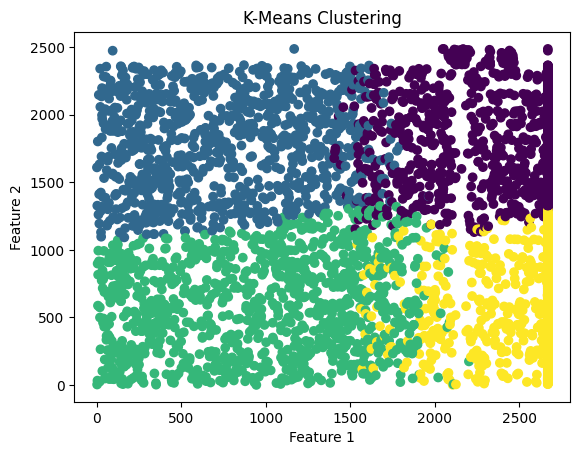

In [249]:
# 5. Clustering
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# Silhouette Score
sil_score = silhouette_score(X, clusters)
print(f"Silhouette Score: {sil_score}")

# Visualize Clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap="viridis")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 6. Time-Series Analysis
# Example: HbA1c Trend Prediction (Replace 'HbA1c' with the actual column name)
if 'HbA1c' in df.columns:
    hba1c_data = df['HbA1c'][:100]  # Example: First 100 entries
    model = ARIMA(hba1c_data, order=(1, 1, 1))
    arima_result = model.fit()
    print(arima_result.summary())

    # Forecast
    forecast = arima_result.forecast(steps=10)
    plt.plot(range(len(hba1c_data)), hba1c_data, label="Actual")
    plt.plot(range(len(hba1c_data), len(hba1c_data) + 10), forecast, label="Forecast")
    plt.legend()
    plt.title("HbA1c Trend Forecast")
    plt.show()
